

---
지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [59]:
df =pd.read_csv('/content/drive/MyDrive/ddddd/project 1/vgames2.csv', index_col=0)

In [60]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [62]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [63]:
target = ['Year', 'Genre', 'Publisher']   # 결측치가 있는 feature들에 대하여 
for i in target:
  print(df[i].value_counts())

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64
Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Game Arts                          1
Max Five                           1
CCP                                1
Quelle                             1
Just Flight                        1
Name: Publisher, Length: 578, dtype: int64


In [64]:
df1 = df.dropna()

In [65]:
df1 = df1.reset_index(drop=True)

In [66]:
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [67]:
drop_index = df1.loc[(df1['Year']<1980)].index

In [68]:
df1 = df1.drop(drop_index, axis=0)

In [69]:
df1 = df1.reset_index(drop=True)

In [70]:
df1.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [72]:
target = ['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']   # object 형임
for i in target:
  print(df1[i].value_counts())

0       4335
0.02     521
0.03     516
0.04     510
0.05     509
        ... 
1.86       1
6.91       1
3.88       1
4.14       1
4.18       1
Name: NA_Sales, Length: 486, dtype: int64
0        5503
0.01     1434
0.02     1225
0.03      897
0.04      716
         ... 
1.88        1
8.89        1
2.93M       1
2130K       1
7.06        1
Name: EU_Sales, Length: 358, dtype: int64
0        9996
0.02      699
0.01      680
0.03      514
0.04      386
         ... 
2.68        1
0.77M       1
2.1         1
1.5         1
1.37        1
Name: JP_Sales, Length: 278, dtype: int64
0       6182
0.01    3315
0.02    1533
0.03     898
0.04     647
        ... 
1.05       1
340K       1
1.78       1
1.41       1
2.26       1
Name: Other_Sales, Length: 188, dtype: int64


In [73]:
NA_Sales_index = df1.loc[(df1['NA_Sales'].str.contains('[a-zA-Z]')==True)].index

In [187]:
len(NA_Sales_index)

188

In [74]:
EU_Sales_index = df1.loc[(df1['EU_Sales'].str.contains('[a-zA-Z]')==True)].index

In [75]:
JP_Sales_index = df1.loc[(df1['JP_Sales'].str.contains('[a-zA-Z]')==True)].index

In [76]:
Other_Sales_index = df1.loc[(df1['Other_Sales'].str.contains('[a-zA-Z]')==True)].index

In [77]:
a =set(list(NA_Sales_index)+list(EU_Sales_index)+list(JP_Sales_index)+list(Other_Sales_index))

In [78]:
df2 = df1.drop(index = a)

In [79]:
target = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
df2[target]= df2[target].astype(float)


In [188]:
df2['Sales']=df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']#

In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15382 entries, 0 to 15381
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15382 non-null  object 
 1   Platform     15382 non-null  object 
 2   Year         15382 non-null  float64
 3   Genre        15382 non-null  object 
 4   Publisher    15382 non-null  object 
 5   NA_Sales     15382 non-null  float64
 6   EU_Sales     15382 non-null  float64
 7   JP_Sales     15382 non-null  float64
 8   Other_Sales  15382 non-null  float64
 9   Sales        15382 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.2+ MB


In [189]:
df2.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
count,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000
mean,2006.404499,0.263634,0.146385,0.077502,0.048359,0.535881
std,5.834124,0.824291,0.510656,0.307178,0.192926,1.568482
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

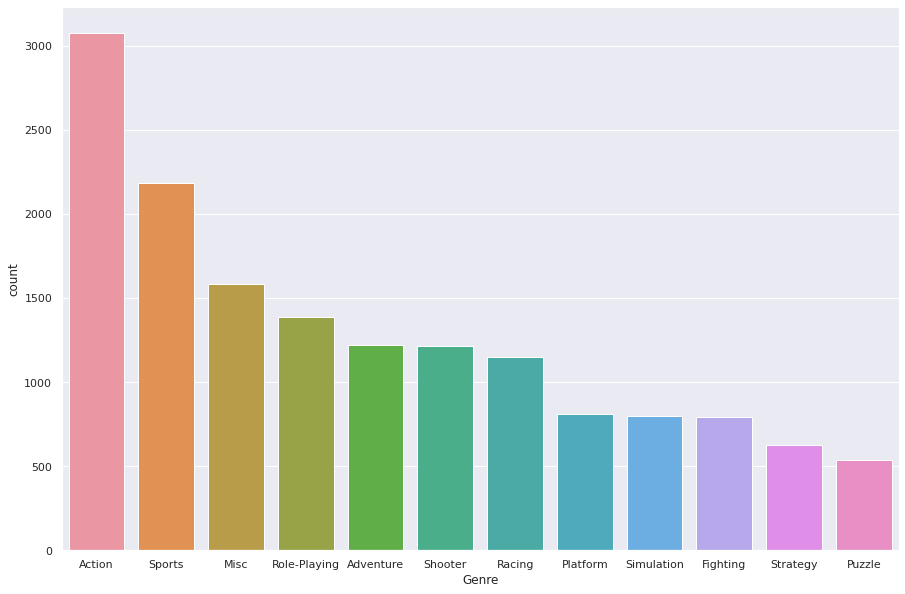

In [191]:
# 장르별 게임 수
plt.figure(figsize=(15, 10))   
sns.countplot(x="Genre", data=df2, order = df2['Genre'].value_counts().index)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

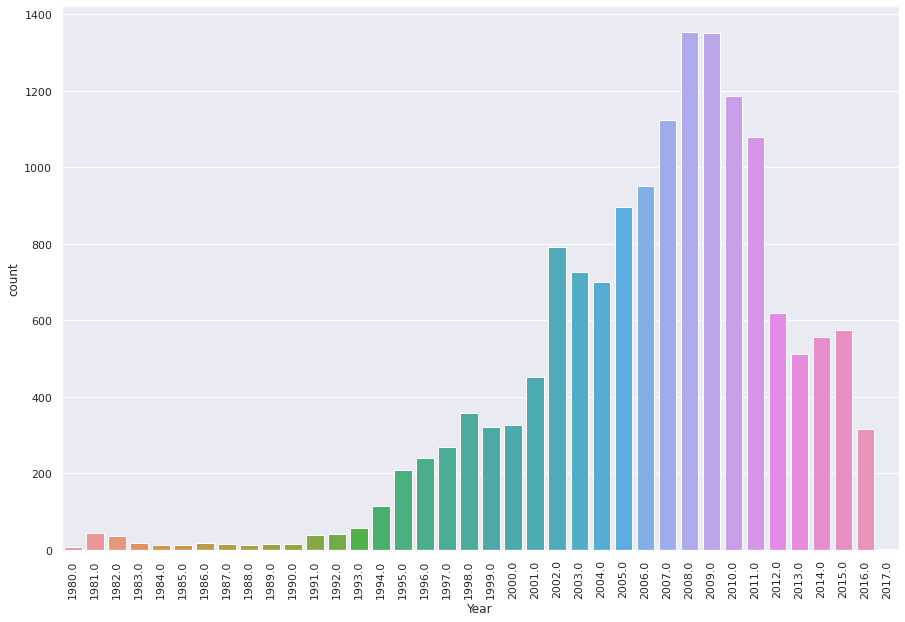

In [211]:
# 연도별 게임수 오름차순
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df2, order = df2.groupby(by=['Year'])['Name'].count().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

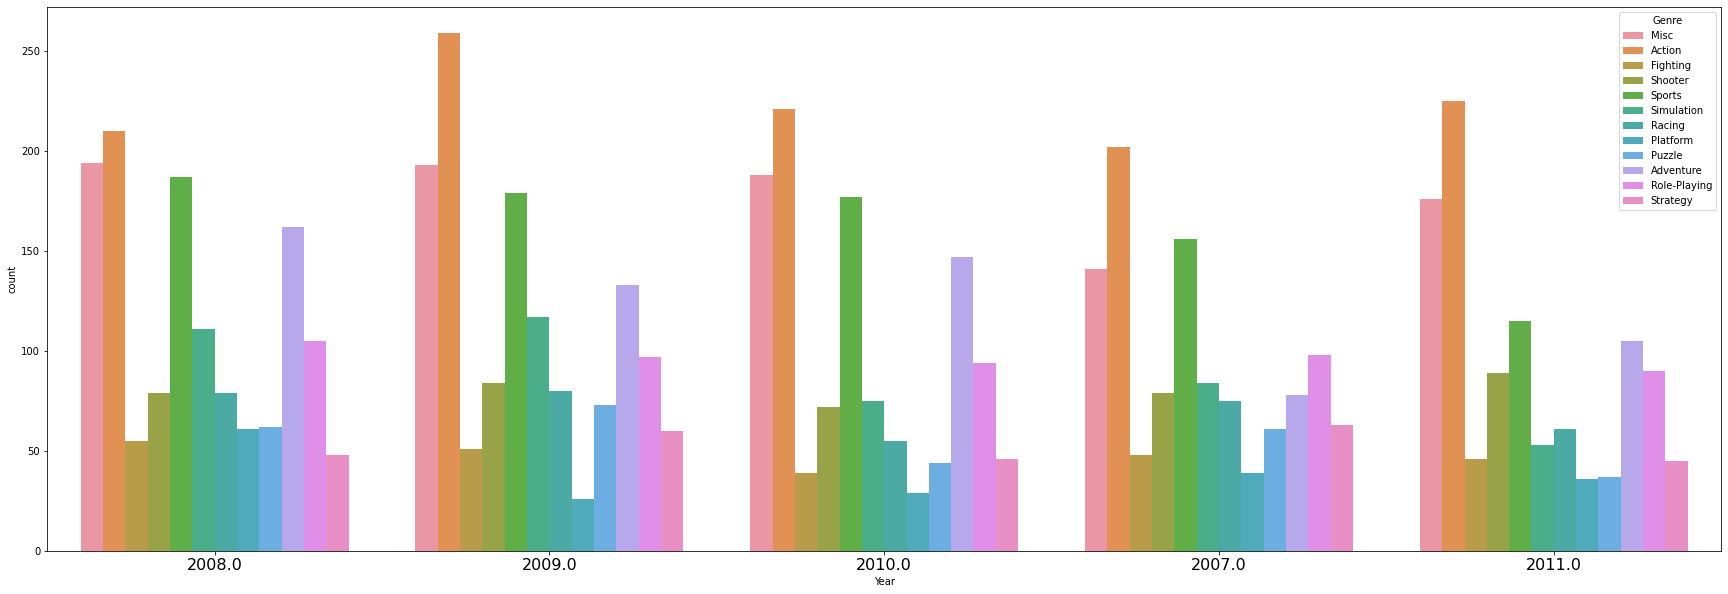

In [106]:
#top5 year 의 장르별 게임수
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df2, hue='Genre', order=df2.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

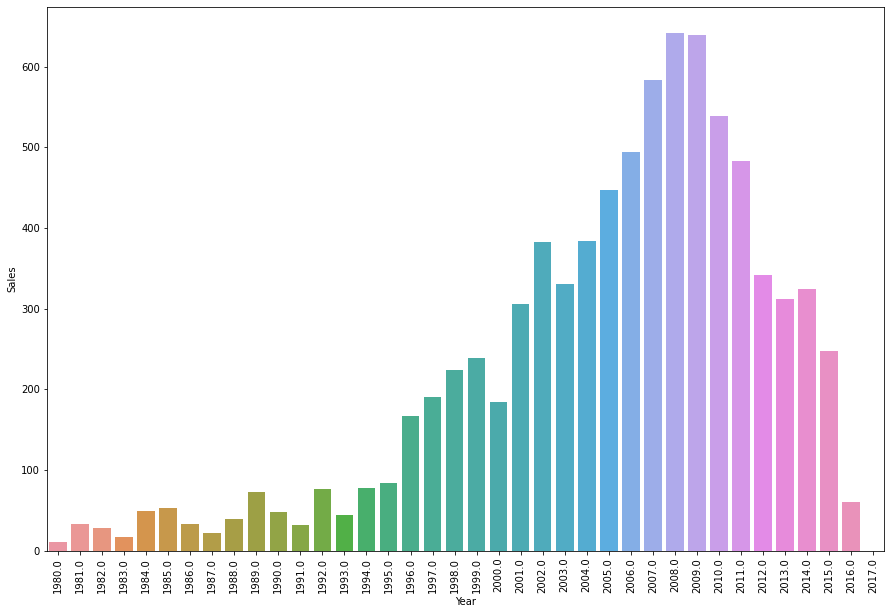

In [108]:
#연도별 sales
data_year = df2.groupby(by=['Year'])['Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Sales", data=data_year)
plt.xticks(rotation=90)

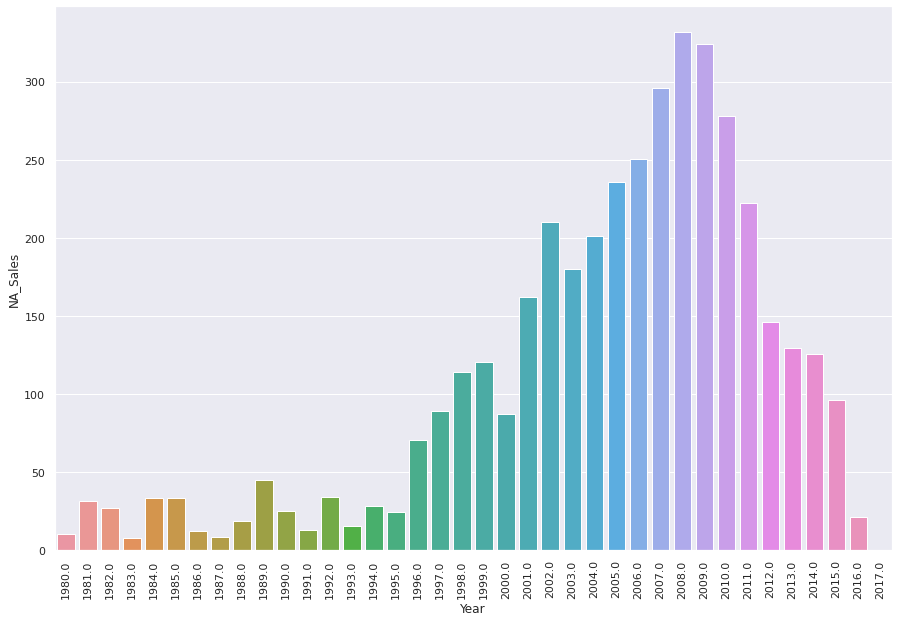

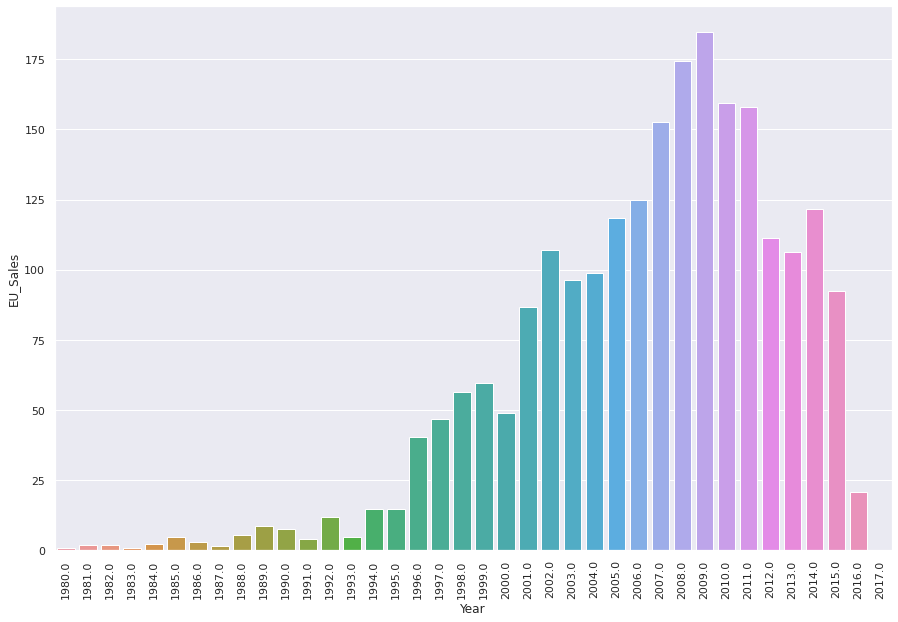

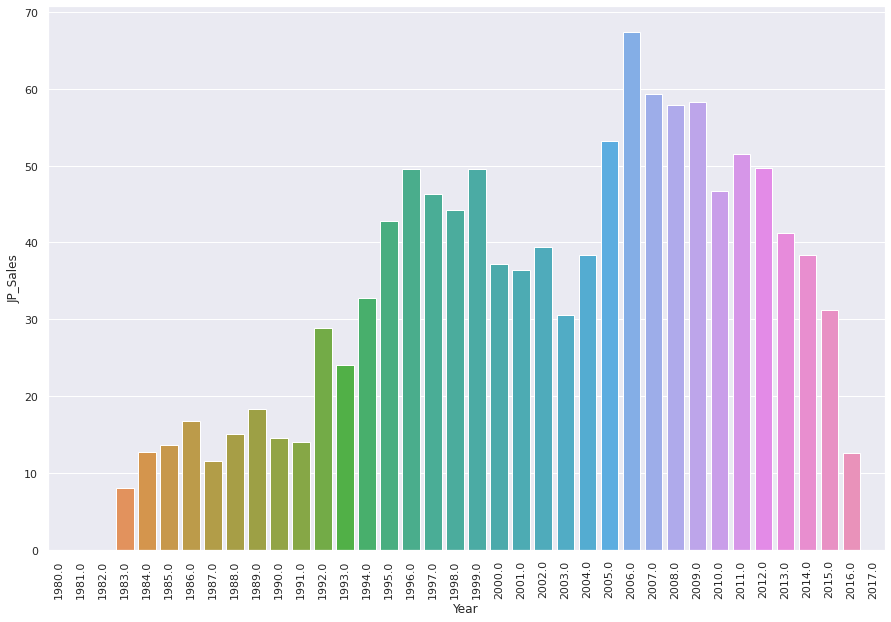

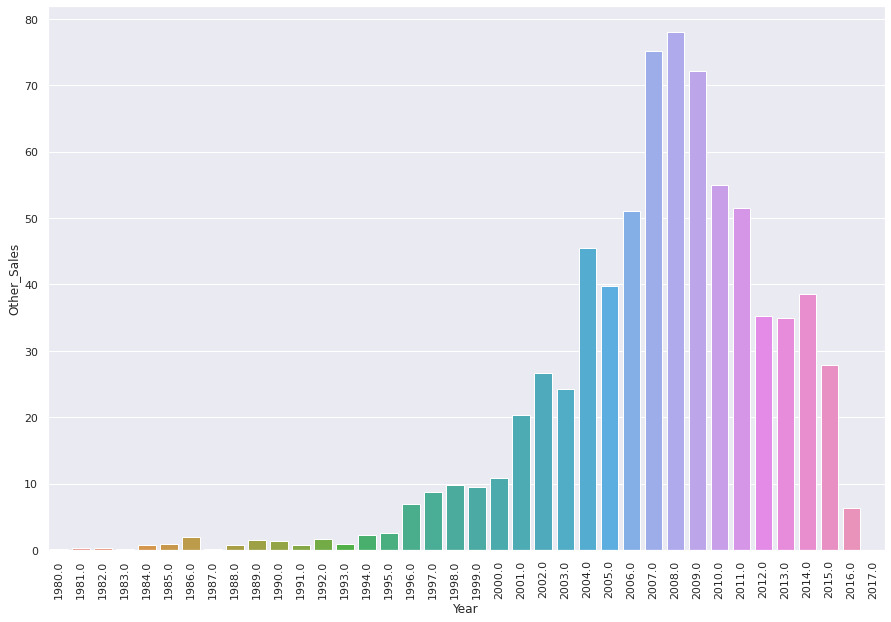

In [201]:
#연도별 sales
i_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for i in i_sales:
  data_year = df2.groupby(by=['Year'])[i].sum()
  data_year = data_year.reset_index()
  plt.figure(figsize=(15, 10))
  sns.barplot(x="Year", y=i, data=data_year)
  plt.xticks(rotation=90)
plt.show()

In [120]:
comp_genre = df2[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
#comp_map

In [116]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,801.89
1,Adventure,NA_Sales,97.29
2,Fighting,NA_Sales,210.51
3,Misc,NA_Sales,380.36
4,Platform,NA_Sales,410.96


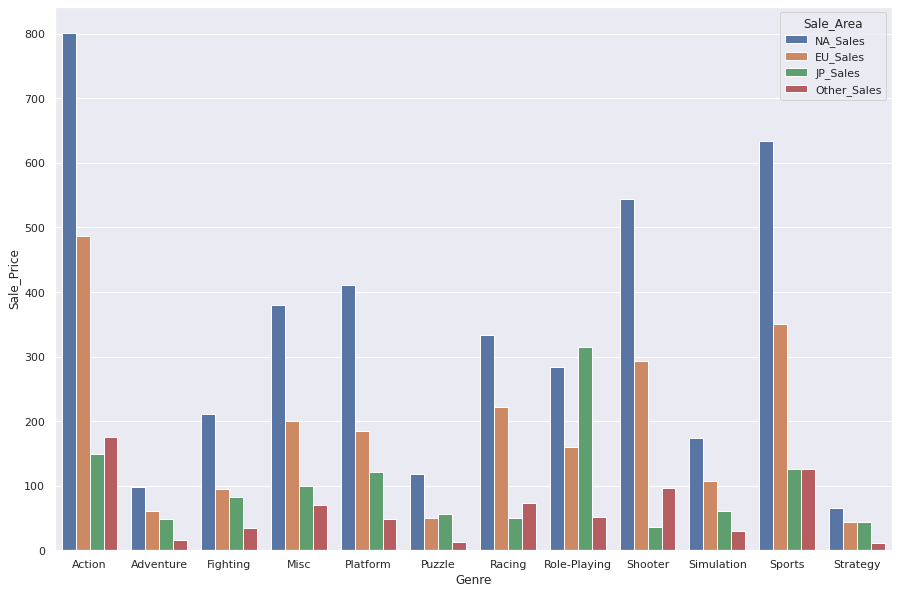

In [117]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

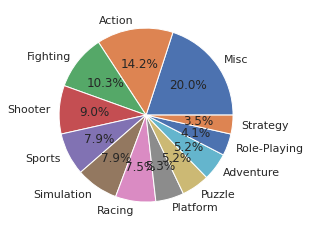

In [203]:
plt.pie(df2['Genre'].value_counts(normalize=True), labels=df2['Genre'].unique(), autopct='%.1f%%')
plt.show()

In [ ]:
df2['']

In [92]:
df2=df2.sort_values('Year',ascending=True,ignore_index=True)
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
1,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34
2,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
3,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05
4,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
...,...,...,...,...,...,...,...,...,...,...
15377,Sengoku Otome: Legend Battle,PSV,2016.0,Action,Unknown,0.00,0.00,0.02,0.00,0.02
15378,Guilty Gear Xrd -Revelator-,PS4,2016.0,Fighting,PQube,0.02,0.00,0.05,0.00,0.07
15379,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
15380,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [95]:
#연도별 top 장르


In [124]:
top_publisher =  df2[['Year', 'Genre']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Genre']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
# top_publisher_count

In [128]:
publisher= top_publisher_count['Genre']

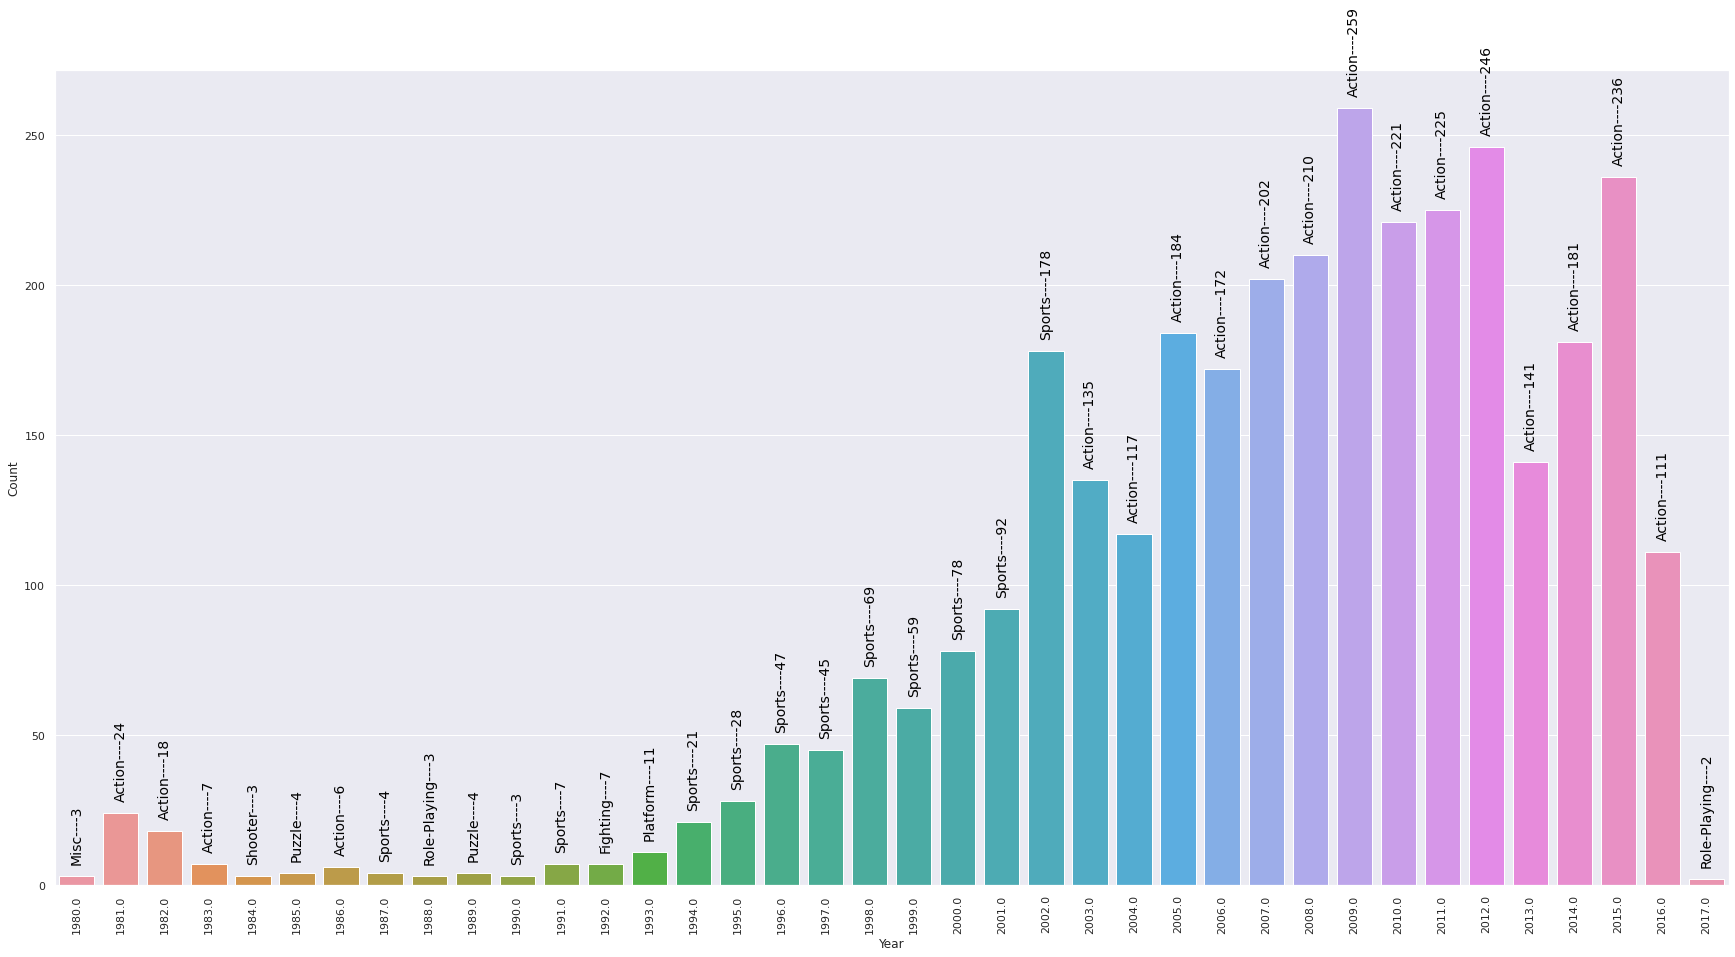

In [129]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

In [183]:
# 출고량이 높은순 20개의 데이터에서 
df3 = df2.sort_values('Sales',ascending=False,ignore_index=True)
df3 = df3.head(20)

In [208]:
df3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


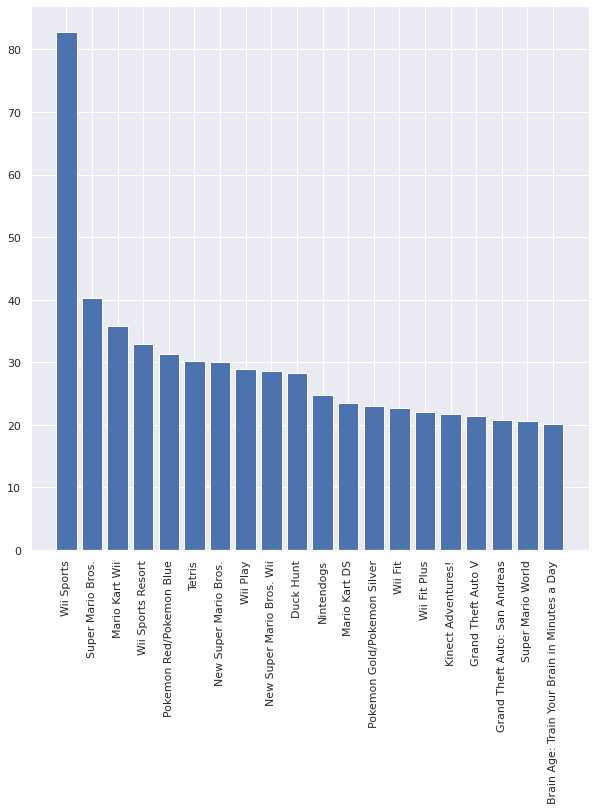

In [202]:
plt.figure(figsize=(10, 10))
plt.bar(df3['Name'],df3['Sales'])
plt.xticks(rotation=90)

plt.show()

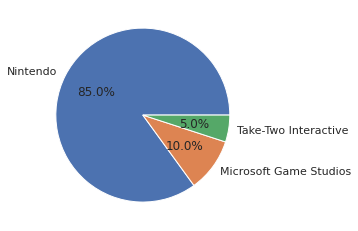

In [185]:
plt.pie(df3['Publisher'].value_counts(normalize=True), labels=df3['Publisher'].unique(), autopct='%.1f%%')
plt.show()

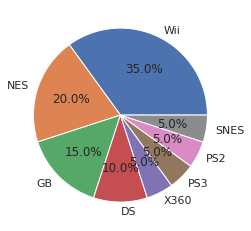

In [186]:
plt.pie(df3['Platform'].value_counts(normalize=True), labels=df3['Platform'].unique(), autopct='%.1f%%')
plt.show()

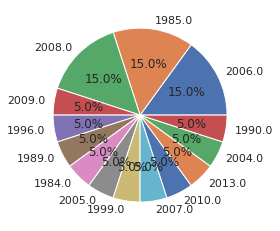

In [209]:
plt.figure(figsize=(10, 10))
plt.bar(df3['Name'],df3['Sales'])
plt.xticks(rotation=90)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

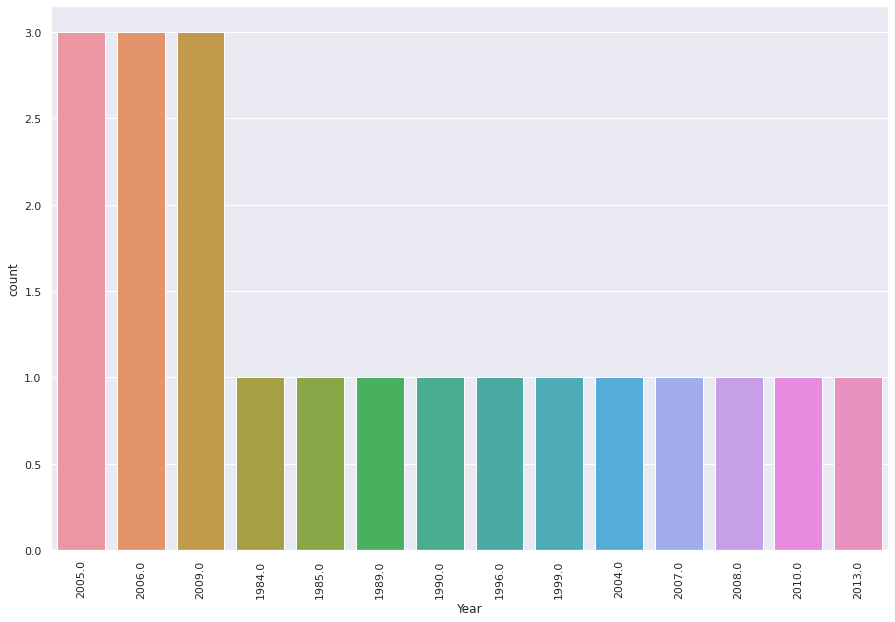

In [210]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df3, order = df3.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

In [216]:
ddf = df2.loc[(df2['Year']>1995)]

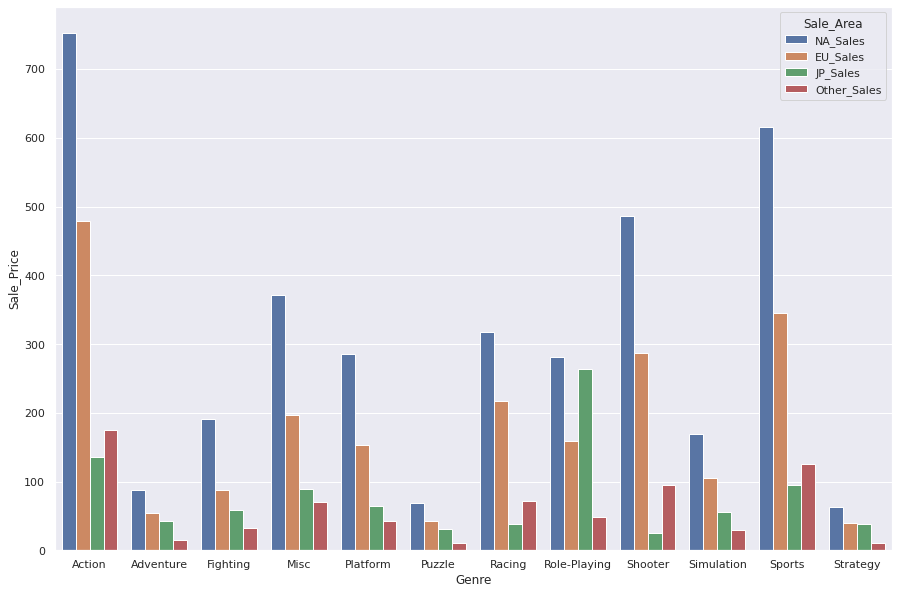

In [217]:
comp_genre = ddf[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
#comp_map
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)